In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
data = pd.read_csv('./output/submission/lgbm_blended_2.csv')
best = data.target.values

In [10]:
best

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
preds = []
paths=['./output/submission/lgbm_800.csv',
       './output/submission/lgbm_blended_2.csv',
       './output/10/proba.csv',
       './output/10/proba_blend.csv',
       './output/10/blend_bin1.csv',
       './output/10/blend_bin2.csv',
       './output/10/blend_bin3.csv',
       './output/10/blend_bin4.csv',
       './output/10/blend_bin5.csv',
       './output/10/blend800_bin1.csv',
       './output/10/blend800_bin2.csv',
       './output/10/blend800_bin3.csv',
       './output/10/blend800_bin4.csv',
       './output/10/blend800_bin5.csv',
       './output/10/blend2_bin1.csv',
       './output/10/blend2_bin2.csv',
       './output/10/blend2_bin3.csv',
       './output/10/blend2_bin4.csv',
       './output/10/blend2_bin5.csv',
       './output/10/blend2_bin6.csv',

      ]
for path in paths:
    data = pd.read_csv(path)
    data = data.target.values
    preds.append(data)
    

In [18]:
covs=[]
for path, pred in zip(paths,preds):
    x=np.cov(best,pred)[0,1]
    covs.append(x)
    print(path,'cov:',x)

./output/submission/lgbm_800.csv cov: 0.1863924068917785
./output/submission/lgbm_blended_2.csv cov: 0.19233553988196994
./output/10/proba.csv cov: 0.18310714720782884
./output/10/proba_blend.csv cov: 0.1870234541673881
./output/10/blend_bin1.csv cov: 0.189296132817803
./output/10/blend_bin2.csv cov: 0.189296132817803
./output/10/blend_bin3.csv cov: 0.1867853595885354
./output/10/blend_bin4.csv cov: 0.1867853595885354
./output/10/blend_bin5.csv cov: 0.18578335883482877
./output/10/blend800_bin1.csv cov: 0.18726316552410635
./output/10/blend800_bin2.csv cov: 0.18726316552410635
./output/10/blend800_bin3.csv cov: 0.18616698834996653
./output/10/blend800_bin4.csv cov: 0.18616698834996653
./output/10/blend800_bin5.csv cov: 0.18535599619063678
./output/10/blend2_bin1.csv cov: 0.18927287204945473
./output/10/blend2_bin2.csv cov: 0.18927287204945473
./output/10/blend2_bin3.csv cov: 0.18844171112041633
./output/10/blend2_bin4.csv cov: 0.18844171112041633
./output/10/blend2_bin5.csv cov: 0.1867

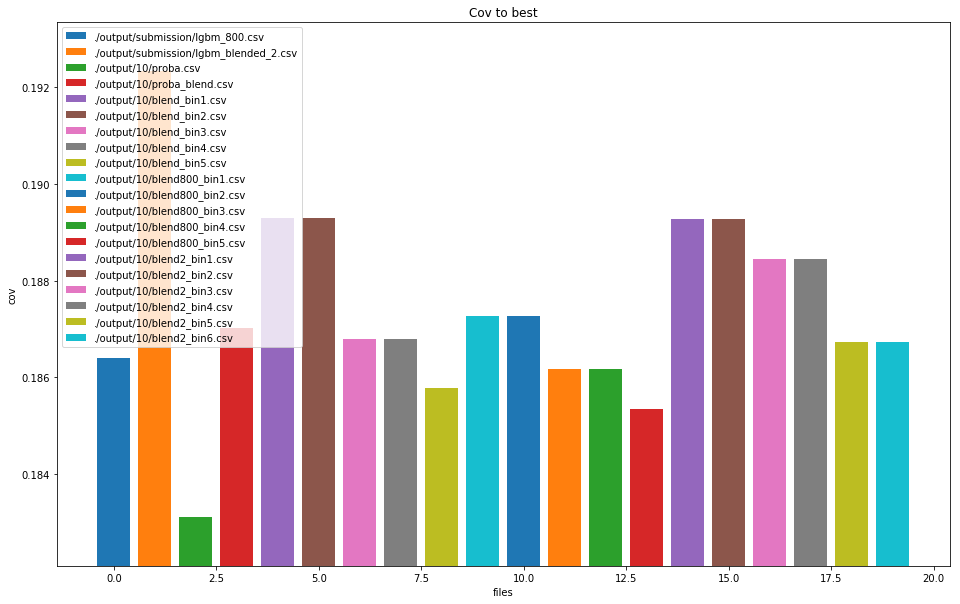

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)


# Plot
for i in range(len(preds)):
    ax.bar(x=i,height=covs[i],label=paths[i])
    
ax.set_ylim(min(covs)-0.001,max(covs)+0.001)
ax.set(xlabel='files', ylabel='cov',
       title='Cov to best')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()